# HSC Investigation based on Source Clusters

In [7]:
import scanpy as sc
import pandas as pd
from sklearn.cluster import KMeans
import anndata as ad
import numpy as np

In [5]:
adata = sc.read_h5ad('/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/jpic/initial_cluster_centroids.h5ad')
adata.shape

/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


(6325, 512)

In [28]:
clusters = np.tile(np.arange(1,26), (1,int(adata.shape[0]/25)))

In [30]:
clusters.shape

(1, 6325)

In [33]:
clusters[0]

array([ 1,  2,  3, ..., 23, 24, 25])

In [34]:
adata.obs['cluster'] = clusters[0]

/home/jpic/.local/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


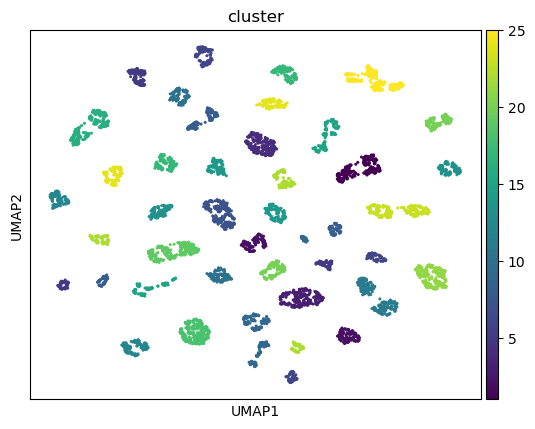

In [36]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

# Compute the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)

# Compute the UMAP representation
sc.tl.umap(adata)

# Cluster the cells using Leiden clustering
# sc.tl.leiden(adata, resolution=0.5)

# Plot the UMAP, coloring by the cluster labels
sc.pl.umap(adata, color='cluster')
